# Independent investigation of TMDB movie data that will knock your socks off:
### Just take them off now ok?
First let's read/convert our CSV to a Pandas dataframe:

In [1]:
## I prefer to import each library at the beginning of the Notebook
## It is important to note that this investigation was built using the Python 2 kernel, 
## so there will be errors in the print statements if you are using Python 3.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Let's start by creating our PandaS DataFrame from the provided CSV:

In [2]:
movie_data = pd.read_csv('tmdb-movies.csv')

movie_data.head(5)
#printing only the first 5 rows will allow me to see what data is contained in my DataFrame:

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# In this investigation I would like to know how budget and revenue relate to the popularity rating.

- I postulate there is a positive correlation between popularity vs budget, as well as revenue vs popularity. I am not sure about budget vs revenue, but I think there will be a positive correlation here as well.
    - My hypothesis is that the more money spent, the more exposure a film gets, and therefore the more revenue and higher popularity rating.

### Here are some ways I plan to do this after cleaning/wrangling:

Primary Analyis:

1.) Group the data by year, analyzing 3 seperate years each 10 years apart

2.) Plot popularity vs revenue, popularity vs budget, budget vs revenue

3.) Calculate Pearson's R Value for each correlation
    
4.) Create a scatter plot of revenue and budget for each selected year, with the size of each dot being popularity

Secondary Analysis:

1.) Confirm or deny findings by graphing each correlation (R value) over time


### Important Note(s):

- In actuality many variables contribute to a films popularity, however, we cannot investigate them all for brevity's sake. Most big data companies can do this using more complex algorithms. **Please see the limitations section at the end of this investigation.**


- I do not know the exact calculation used to acquire the popularity rating. This may affect our conclusions since we can only assume that the higher the number, the more popular the film.


## Before wrangling data, we should build functions to standardize our data, and calculate Pearson's R:

This functions will be valuable later in the analysis as you will soon see

In [80]:
# Let's start by defining functions to standardize our data:

# for standardizing columns of data.
def standardize_column(column):
    return (column-column.mean()) / column.std(ddof=0)

# for standardizing rows, I may not use this one.
def standardize_rows(df):
    mean_diffs = df.sub(df.mean(axis='columns'), axis='index')
    return mean_diffs.div(df.std(axis='columns',ddof=0), axis='index')

def standardize(df):
    return df.apply(standardize_column)

# And this function will help us see a correlation between two sets of variables (Pearson's R)
# We may need to adapt it to the data fram we are using later on

def correlation(x,y):
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

## For starters, I would like to slice the data to create three data sets, the most current year 2015 (our primary investigation set) and  for comparison: 2000 and 1985.

These snapshots will help me to get a quick picture of the data before I investigate the whole set.

We can use PandaS `set_index()` function to set the index to the movie title to make our data more understandable.

I noticed that PandaS used Float values for adjusted revenue and budget, we need those to be integers to work with them.

In [81]:
# First thing to do will be to convert the values to integers:
movie_data['budget_adj'] = movie_data['budget_adj'].apply(np.int64)
movie_data['revenue_adj'] = movie_data['revenue_adj'].apply(np.int64)

In [82]:
# let's set the index to be the title so the data is more readable:
movies_in_2015 = movie_data[movie_data['release_year']==2015].set_index('original_title')
movies_in_2000 = movie_data[movie_data['release_year']==2000].set_index('original_title')
movies_in_1985 = movie_data[movie_data['release_year']==1985].set_index('original_title')

## Next, let's trim down our dataframe to only include the factors budget, revenue, and popularity

In [83]:
# Slice out the data we wnat to use:
pop_bdgt_rev_2015 = movies_in_2015[['budget_adj','popularity', 'revenue_adj']]
pop_bdgt_rev_2000 = movies_in_2000[['budget_adj','popularity', 'revenue_adj']]
pop_bdgt_rev_1985 = movies_in_1985[['budget_adj','popularity', 'revenue_adj']]
# Taking a peak at the first 20 entries:
pop_bdgt_rev_1985.head(20)

,budget_adj,popularity,revenue_adj
original_title,,,
Back to the Future,38516154,6.095293,772572771
The Breakfast Club,2027166,2.834739,104450077
Ladyhawke,40543321,1.753688,37364724
Mad Max Beyond Thunderdome,24945338,1.746063,73444670
A View to a Kill,60814981,1.623978,308996785
Legend,50679151,1.613752,31425355
The Goonies,38516154,1.596994,124447075
A Nightmare on Elm Street Part 2: Freddy's Revenge,6081498,1.299275,60813386
Rambo: First Blood Part II,89195306,1.177428,608961557


## Wait, what are those '0's? 
Let's make a histogram to see if there are a significant number of them:

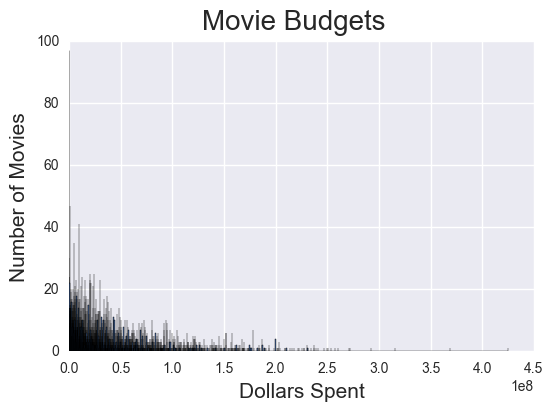

In [104]:
pop_hist = pop_bdgt_rev_all['budget_adj']
pop_hist.hist(bins=(len(pop_hist)))

# Let's label the graph:
plt.suptitle('Movie Budgets', fontsize = 20)
plt.xlabel('Dollars Spent', fontsize=15)
plt.ylabel("Number of Movies", fontsize=15)
plt.legend(fontsize=8)


## Looking carefully at the histogram we see a lot of movies with no budget!
That doesn't seem right, because it's impossible for a movie not to have a budget. Perhaps for some movies, this data was simply not made available and auto-filled as '0'? So let's clean up the data and remove those entries, simply because we cannot use or trust them:

In [85]:
# 2015
pop_bdgt_rev_2015 = pop_bdgt_rev_2015[pop_bdgt_rev_2015['budget_adj']>0]
# 2000
pop_bdgt_rev_2000 = pop_bdgt_rev_2000[pop_bdgt_rev_2000['budget_adj']>0]
# 1985
pop_bdgt_rev_1985 = pop_bdgt_rev_1985[pop_bdgt_rev_1985['budget_adj']>0]

# Now we see only the movies with data for budget:
pop_bdgt_rev_2015.head(20)

,budget_adj,popularity,revenue_adj
original_title,,,
Jurassic World,137999939,32.985763,1392445892
Mad Max: Fury Road,137999939,28.419936,348161292
Insurgent,101199955,13.112507,271619025
Star Wars: The Force Awakens,183999919,11.173104,1902723129
Furious 7,174799923,9.335014,1385748801
The Revenant,124199945,9.110700,490314247
Terminator Genisys,142599937,8.654359,405355075
The Martian,99359956,7.667400,547749654
Minions,68079970,7.404165,1064192016


# We can start by calculating Pearson's R to see if there is a positive correlation:

Pearson's R (calculated using our previously defined '`correlation`' function) will tell us if two variables are correlated. If the value is 1 there is a total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

## Let's investigate Budget vs Popularity:

**2015**

In [86]:
correlation(pop_bdgt_rev_2015['budget_adj'], pop_bdgt_rev_2015['popularity'])

0.60559235803122269

**2000**

In [87]:
correlation(pop_bdgt_rev_2000['budget_adj'], pop_bdgt_rev_2000['popularity'])

0.41627482678603367

**1985**

In [88]:
correlation(pop_bdgt_rev_1985['budget_adj'], pop_bdgt_rev_1985['popularity'])

0.17416336790445094

### There appears to be a positive correlation increasing over time

## Now let's investigate Revenue vs Popularity:


**2015**

In [89]:
correlation(pop_bdgt_rev_2015['revenue_adj'], pop_bdgt_rev_2015['popularity'])

0.66266798299720631

**2000**

In [90]:
correlation(pop_bdgt_rev_2000['revenue_adj'], pop_bdgt_rev_2000['popularity'])

0.69767842785117118

**1985**

In [91]:
correlation(pop_bdgt_rev_1985['revenue_adj'], pop_bdgt_rev_1985['popularity'])

0.67018810052408861

### There appears to be a positive correlation staying roughly the same over time

## What about Budget vs Revenue?

**2015**

In [92]:
correlation(pop_bdgt_rev_2015['revenue_adj'], pop_bdgt_rev_2015['budget_adj'])

0.7752261758694533

**2000**

In [93]:
correlation(pop_bdgt_rev_2000['revenue_adj'], pop_bdgt_rev_2000['budget_adj'])

0.64561118854388466

**1985**

In [94]:
correlation(pop_bdgt_rev_1985['revenue_adj'], pop_bdgt_rev_1985['budget_adj'])

0.44551820197540726

### There appears to be a positive correlation increasing over time

# Next we can create a 3d scatter plot* to see the correlation between budget, revenue and popularity

*Dot size is the standardized popularity rating times 10

### Let's start by standardizing our columns:
#### This will make our data easy to compare, since the values for revenue and popularity are wildly different.

In [95]:
# We will do this by using our predefined 'standardize function'
standardized_data_2015 = standardize(pop_bdgt_rev_2015)
standardized_data_2000 = standardize(pop_bdgt_rev_2000)
standardized_data_1985 = standardize(pop_bdgt_rev_1985)

# here is a sample:
standardized_data_2015.head()

,budget_adj,popularity,revenue_adj
original_title,,,
Jurassic World,2.313175,8.814597,5.113760
Mad Max: Fury Road,2.313175,7.502616,0.934046
Insurgent,1.500294,3.104059,0.627688
Star Wars: The Force Awakens,3.329277,2.546776,7.156127
Furious 7,3.126057,2.018605,5.086955


## Now that our data is all standardized, we can make neat plots to show trends:

In theory, we should be able to visualize the correlation we saw earlier when calculating Pearson's R...

Populating the interactive namespace from numpy and matplotlib


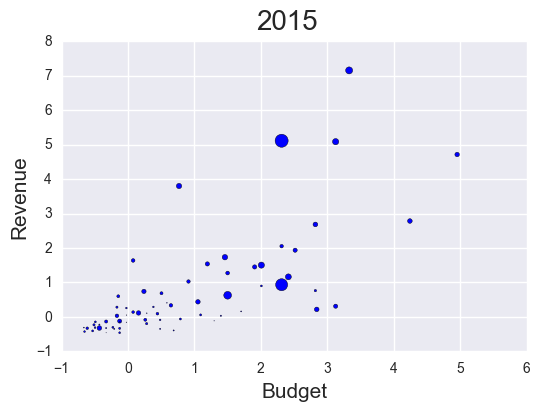

In [96]:
%pylab inline

plt.scatter(standardized_data_2015['budget_adj'], standardized_data_2015['revenue_adj'], \
            s= (standardized_data_2015['popularity']*10))

# Let's label the graph:
plt.suptitle('2015', fontsize = 20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel("Revenue", fontsize=15)

### Conclusion: From the placement of these dots, you can see that as budget increases, so does revenue and popularity for the year 2015. This matches our initial hypothesis.

Let's graph 1985 and 2000 for comparison

Populating the interactive namespace from numpy and matplotlib


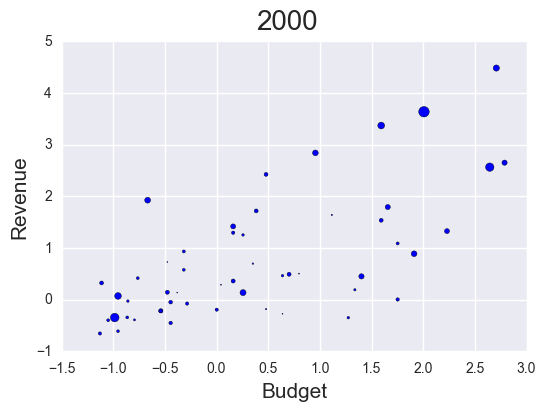

In [97]:
%pylab inline

plt.scatter(standardized_data_2000['budget_adj'], standardized_data_2000['revenue_adj'], \
            s= (standardized_data_2000['popularity']*10))

# Let's label the graph:
plt.suptitle('2000', fontsize = 20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel("Revenue", fontsize=15)

### For the year 2000 we can make the same conclusion, but we see a slightly weaker correlation

Populating the interactive namespace from numpy and matplotlib


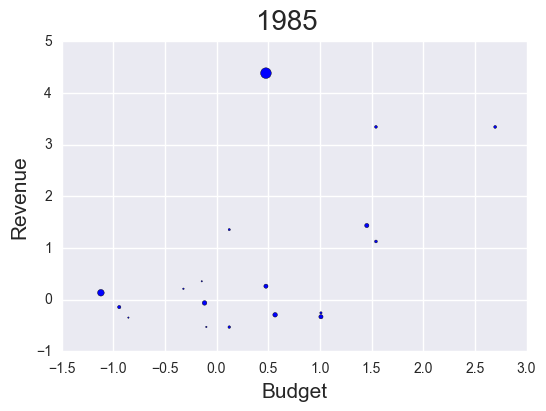

In [98]:
%pylab inline

plt.scatter(standardized_data_1985['budget_adj'], standardized_data_1985['revenue_adj'], \
            s= (standardized_data_1985['popularity']*10))

# Let's label the graph:
plt.suptitle('1985', fontsize = 20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel("Revenue", fontsize=15)

### And for 1985 the correlation between these three variables is even weaker still

# Summary of Initial Obersvations:
- There is a positive correlation between revenue and popularity
    - This correlation stays the same over time
- There is a positive correlation between budget and popularity
    - This correlation increases over time
- There is a positive correlation between budget and revenue
    - This correlation appears to increase over time

# Now let's plot each correlation over time using our full data set to confirm our initial observations

We will start by standardizing each set of variables from the full data set:

In [99]:
# Data sliced from the full dataframe:
movies_all = movie_data[['release_year','budget_adj','popularity', 'revenue_adj']]
# Trimming out the 0s in the budget category again for all movies:
pop_bdgt_rev_all = movies_all[movies_all['budget_adj']>0]

# Each of these functions are adaptations of the correlation function.
# Each one selects only the variables we need for each comparison.
def correlate_pop_bdgt(df):
    x = df['budget_adj']
    y = df['popularity']
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

def correlate_pop_rev(df):
    x = df['revenue_adj']
    y = df['popularity']
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

def correlate_bdgt_rev(df):
    x = df['revenue_adj']
    y = df['budget_adj']
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

# We now need to apply our correlation function to each column of data
# We will use new variables to represent the individual DataFrames:
bdgt_pop_by_year = pop_bdgt_rev_all.groupby('release_year')[['budget_adj', 'popularity']].apply(correlate_pop_bdgt)

rev_pop_by_year = pop_bdgt_rev_all.groupby('release_year')[['revenue_adj','popularity']].apply(correlate_pop_rev)

rev_bdgt_by_year = pop_bdgt_rev_all.groupby('release_year')[['revenue_adj','budget_adj']].apply(correlate_bdgt_rev)

# Let's take a peek at the mean
print bdgt_pop_by_year.mean()
print rev_pop_by_year.mean()
print rev_bdgt_by_year.mean()

0.355362917158
0.657635652892
0.497085361583


## The ugliest sideways Christmas tree of all time

Now that we have a dataframe for each variable, let's plot both revenue and budget over time. This should allow us to see if the correlations behave the way we hypothesized they would year by year. 

Populating the interactive namespace from numpy and matplotlib


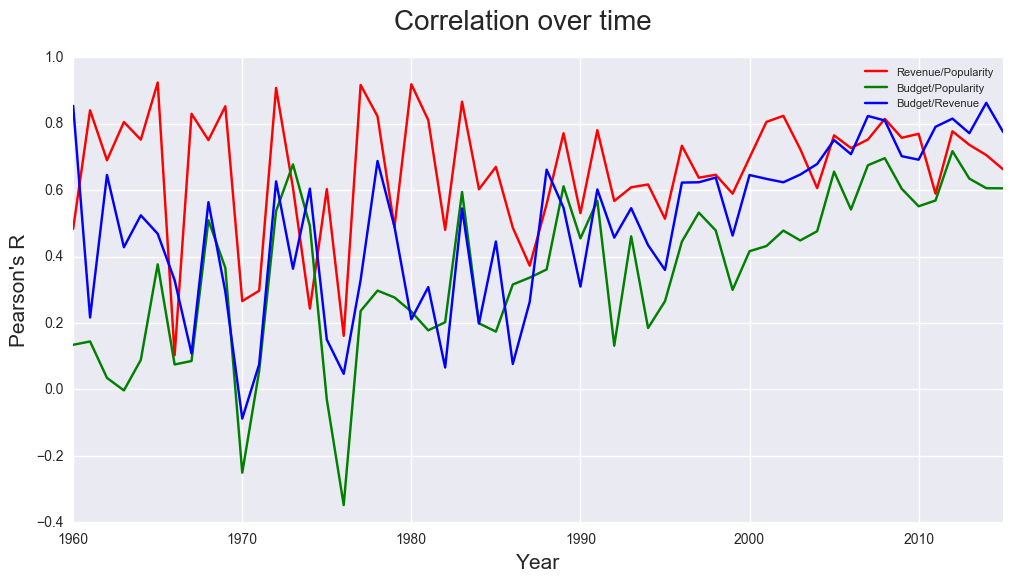

In [101]:
%pylab inline

# this adjusts the size of the window so we can see the lines better:
plt.figure(figsize=(12,6))

# Plotting our correlatoins:
rev_pop_by_year.plot(color='red', label='Revenue/Popularity')
bdgt_pop_by_year.plot(color='green', label='Budget/Popularity')
rev_bdgt_by_year.plot(color='blue', label='Budget/Revenue')

# Let's label the graph:
plt.suptitle('Correlation over time', fontsize = 20)
plt.xlabel('Year', fontsize=15)
plt.ylabel("Pearson's R", fontsize=15)
plt.legend(fontsize=8)

# Conclusions

While this analysis was far from comprehensive, my original hypothesis appears to be confirmed. I also found out the correlation between budget and revenue which I was initially unsure of. Below is a bullet point summary:

- There is a positive correlation between revenue and popularity
    - This correlation on average stays the same over time
    - This is a weak correlation and does change drastically the farther back in time we go
        - This makes sense because most movies that make a lot of money are also popular
        - This has not really changed as long as I can remember
        
        
- There is a positive correlation between budget and popularity
    - This correlation on average increases over time
        - This also makes sense because big budget hollywood films also have fantastic marketing to make them popular
        - This increase in correlation could also mean that the industry has been gradually commercialized?
        - This could make sense because film makers using the internet can understand trends better
        
        
- There is a positive correlation between budget and revenue
    - This correlation appears to be strong before the 70s, then very weak in the 70s-80s, then increase over time after the 1980s
    - While this correlation does jump around from year to year, we still see an overall increase over time
        - This makes sense because again, big budget hollywood films also have fantastic marketing to ensure they succeed
        - This could make sense because film makers using the internet can understand trends better
        
        
- The grouping of these three variables tightens over time
    - This could be because the movie industry is becoming gradually more refined
        - This could make sense because film makers using the internet can understand trends better
        


# * IMPORTANT * - Limitations of this study:

### Overall, to really confirm any of this data, many many more variables would need to be investigated. Below are some factors:

1.) We had to trim out many movies with a budget of '0'
    - If we had this data, how would it affect the investigation?
    
    
2.) We do not know how the other values in the full data set contribute to this investigation
    - In a future investigation for example, we could see how the genre affects this correlation
        - Do sci-fi films have the same correlations as romance?
            - In theory, the cost of sci-fi films special effects could play a role in the budget
            
            
3.) There could be other factors outside TMBD's data set entirely
    - Perhaps the political climate during certain years had an effect on the revenue of certain genres?

This short study has allowed me to probe into film industry data and think critically about correlation of variables and satisfy curiosity. 